In [1]:
#importing necessary libraries

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import glob
import os
from collections import Counter
import pandas as pd
import time
import cv2

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
#loading the dataset into the program with the train/test ratio of 70/30

def load_data(path):
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    split=0.3
    split_size=4000*split

    folders=os.listdir(path)
    for folder in folders:
        i=0
        images_in_folder=os.listdir(path+folder)
        for image in images_in_folder:
            i+=1
            img=Image.open(path+folder+'/'+image)
            image_array=np.array(img)
            if i>=split_size:
                x_train.append(image_array)
                y_train.append(folder)
            else:
                x_test.append(image_array)
                y_test.append(folder)

    return (np.array(x_train),np.array(y_train)),(np.array(x_test),np.array(y_test))

In [75]:
batch_size = 1000
num_classes = 10
epochs = 5
img_x, img_y = 28, 28
path="C:/Users/hp/machine_learning/cnn_with_keras/train_data/"

In [76]:
(x_train, y_train), (x_test, y_test) = load_data(path)

In [77]:
x_train[0].shape

(28, 28)

In [78]:
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [79]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (27805, 28, 28, 1)
27805 train samples
11990 test samples


In [80]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [82]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [83]:
history = AccuracyHistory()

In [84]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 27805 samples, validate on 11990 samples
Epoch 1/5
27805/27805 [==============================] - 43s 2ms/step - loss: 0.8278 - acc: 0.7718 - val_loss: 0.3118 - val_acc: 0.9077
Epoch 2/5
27805/27805 [==============================] - 40s 1ms/step - loss: 0.2136 - acc: 0.9368 - val_loss: 0.1501 - val_acc: 0.9540
Epoch 3/5
27805/27805 [==============================] - 39s 1ms/step - loss: 0.1200 - acc: 0.9639 - val_loss: 0.1051 - val_acc: 0.9682
Epoch 4/5
27805/27805 [==============================] - 39s 1ms/step - loss: 0.0850 - acc: 0.9734 - val_loss: 0.0776 - val_acc: 0.9766
Epoch 5/5
27805/27805 [==============================] - 41s 1ms/step - loss: 0.0650 - acc: 0.9810 - val_loss: 0.0675 - val_acc: 0.9803


Test loss: 0.0491765016340068
Test accuracy: 0.9859049207673061


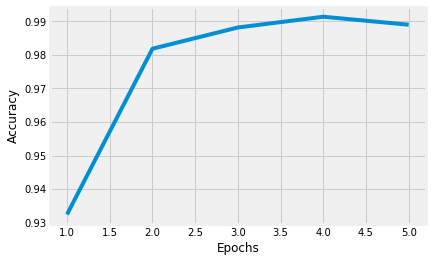

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [66]:
def predict(image,show=True):
    im=np.array(image)
    pr = model.predict_classes(im.reshape((1, 28,28,1)))
    answer=pr.tolist()[0]
    if show:
        plt.imshow(im)
        plt.show()
    #print(answer)
    return answer

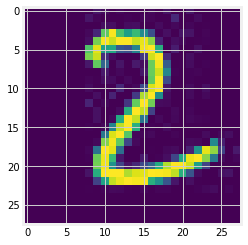

2

In [67]:
path="C:/Users/hp/machine_learning/cnn_with_keras/test/"
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
im=Image.open(path+pic)
predict(im)

(28, 28)


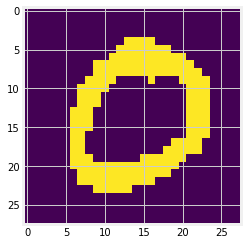

In [68]:
path="C:/Users/hp/machine_learning/cnn_with_keras/test/"
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
img = cv2.imread(path+pic,0)
ret,thresh_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(thresh_img.shape)
plt.imshow(thresh_img)
plt.show()

In [69]:
path='C:/Users/hp/machine_learning/cnn_with_keras/test_data/'
test_folders=os.listdir(path)
#np.random.shuffle(test_folders)
count=0
true_prediction=0
pred_list={int(folder):{int(folder):0 for folder in test_folders} for folder in test_folders}
for folder in test_folders:
    
    img_list=os.listdir(path+folder)
    
    for image in img_list:
        
        image_path=path+folder+'/'+image
        im=Image.open(image_path)
        prediction=str(int(predict(im,False)))
        pred_list[int(folder)][int(prediction)]+=1
        if prediction==folder:
            true_prediction+=1
                      
        count+=1
        
            
print('test size: ',count)
print('true predictions: ',true_prediction)
print('confidence: ',true_prediction/count)

test size:  1097
true predictions:  1075
confidence:  0.9799453053783045


In [70]:
model_yaml = model.to_yaml()
with open("mnist_digit_cnn_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("mnist_digit_cnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [71]:
pred_list

{0: {0: 52, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 1: {0: 0, 1: 84, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {0: 0, 1: 1, 2: 117, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 91, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0},
 4: {0: 0, 1: 1, 2: 0, 3: 0, 4: 143, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 5: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 232, 6: 12, 7: 0, 8: 2, 9: 1},
 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 93, 7: 0, 8: 0, 9: 0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 76, 8: 0, 9: 0},
 8: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 100, 9: 0},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 87}}

In [72]:
#b: blue
#g: green
#r: red
#c: cyan
#m: magenta
#y: yellow
#k: black
#w: white
color=['b','g','r','c','m','y','k']

<function matplotlib.pyplot.show(*args, **kw)>

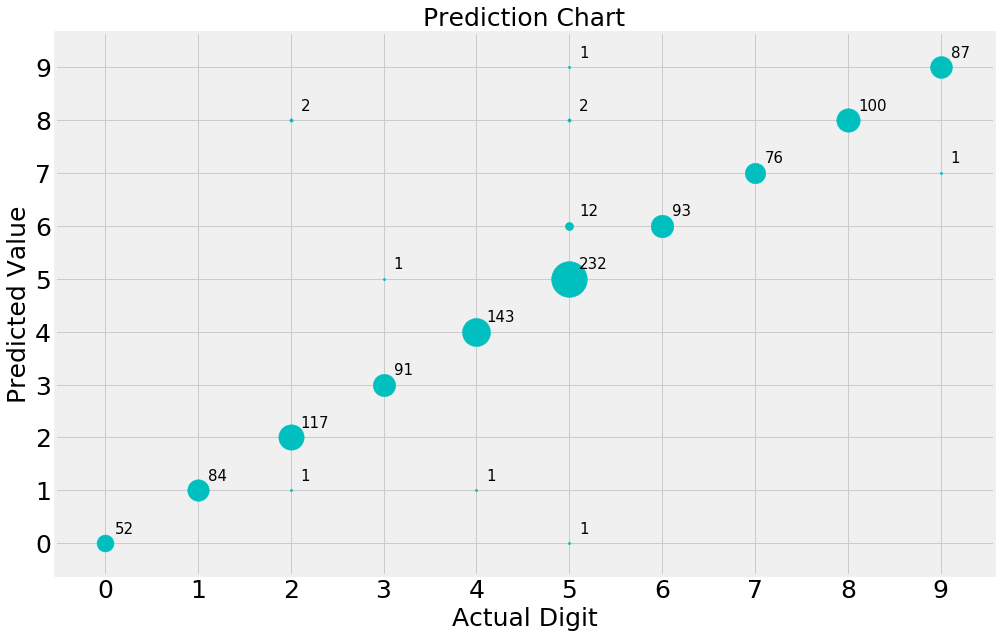

In [73]:
#plt.figure(figsize=(20,10))
plt.figure(figsize=(15,10))
plt.xlabel('Actual Digit',fontsize=25)
plt.ylabel('Predicted Value',fontsize=25)
plt.title('Prediction Chart',fontsize=25)
major_ticks = np.arange(0, 10, 1)                                              
plt.xticks(major_ticks,fontsize=25)                                                       
plt.yticks(major_ticks,fontsize=25) 
plt.grid(True)

for num in pred_list:
    num_data=pred_list[num]
    for pred in num_data:
        plt.scatter([num],[pred],color='c',s=pred_list[num][pred]*5.5)
        if pred_list[num][pred]>0:
            plt.annotate(str(pred_list[num][pred]),xy=(num,pred),fontsize=15, xytext=(10,10), textcoords='offset points')
        #plt.text(num,pred,str(pred_list[num][pred]))
plt.show

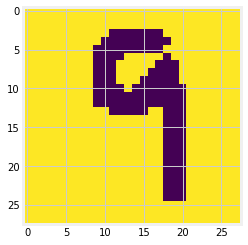

2

In [74]:
path='C:/Users/hp/datascience/digit_recognition/six.png'
im=Image.open(path)
predict(im)